In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [91]:
df = pd.read_excel('data.xlsx')
df = df[(df['CLND_MONTH']<=202002) & (df['DIST_TYPE']=='ABO')]
df.index = df['CLND_DATE']
df.head()

,CLND_MONTH,CLND_DATE,DIST_TYPE,FORCESIZE,RECRUITMENT,RENEWAL_COUNT
CLND_DATE,,,,,,
2014-01-01,201401,2014-01-01,ABO,2063155,56511.0,82651.0
2014-02-01,201402,2014-02-01,ABO,2094186,75686.0,93288.0
2014-03-01,201403,2014-03-01,ABO,2074496,61755.0,117753.0
2014-04-01,201404,2014-04-01,ABO,2046839,55632.0,113471.0
2014-05-01,201405,2014-05-01,ABO,2021661,53679.0,106663.0


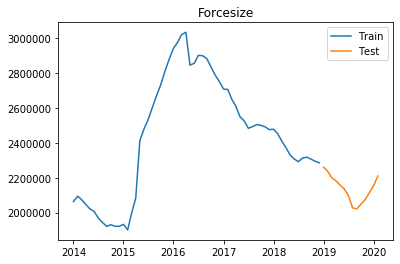

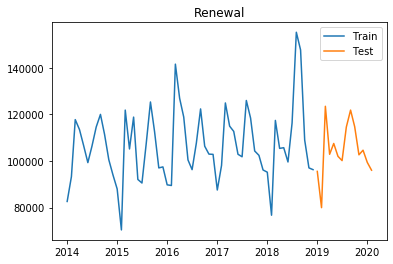

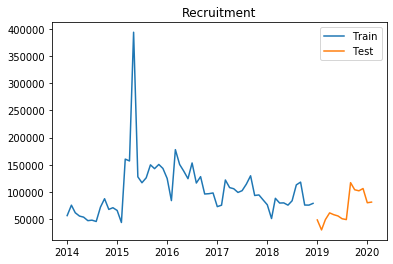

In [92]:
train_data_month = 60
train = df[0:train_data_month]
test = df[train_data_month:]

# plt.figure(figsize=(9, 6))
# plt.subplot(2,1,1)
plt.plot(train.index, train['FORCESIZE'], label='Train')
plt.plot(test.index, test['FORCESIZE'], label='Test')
plt.title('Forcesize')
plt.legend()
plt.show()

# plt.figure(figsize=(9, 6))
# plt.subplot(2,1,1)
plt.plot(train.index, train['RENEWAL_COUNT'], label='Train')
plt.plot(test.index, test['RENEWAL_COUNT'], label='Test')
plt.title('Renewal')
plt.legend()
plt.show()

# plt.figure(figsize=(9, 6))
# plt.subplot(2,1,2)
plt.plot(train.index, train['RECRUITMENT'], label='Train')
plt.plot(test.index, test['RECRUITMENT'], label='Test')
plt.title('Recruitment')
plt.legend()
plt.show()

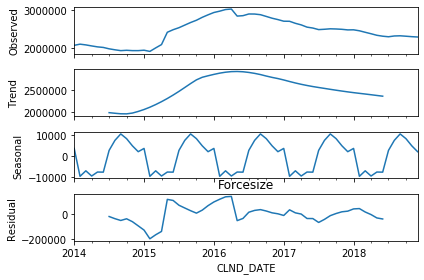

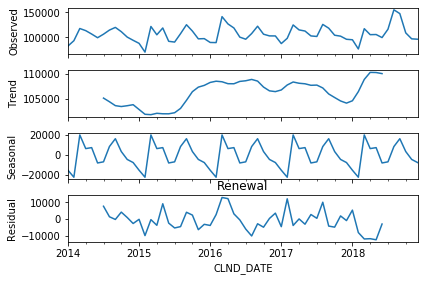

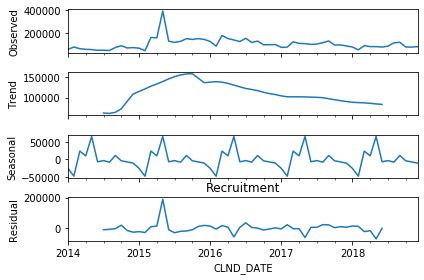

In [93]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['FORCESIZE']).plot()
result = sm.tsa.stattools.adfuller(train['FORCESIZE'])
plt.title('Forcesize')
plt.show()

sm.tsa.seasonal_decompose(train['RENEWAL_COUNT']).plot()
result = sm.tsa.stattools.adfuller(train['RENEWAL_COUNT'])
plt.title('Renewal')
plt.show()

sm.tsa.seasonal_decompose(train['RECRUITMENT']).plot()
result = sm.tsa.stattools.adfuller(train['RECRUITMENT'])
plt.title('Recruitment')
plt.show()


C:\Users\cnu0748s\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


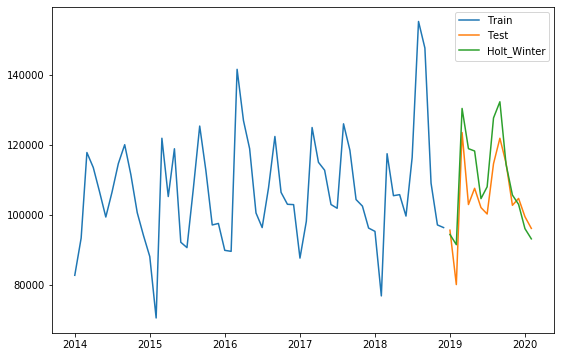

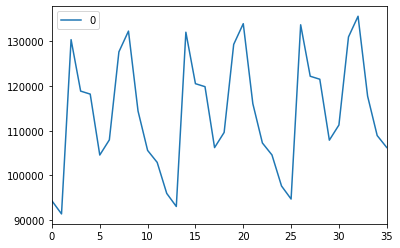

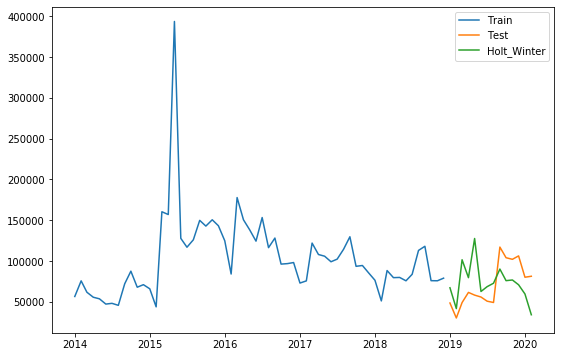

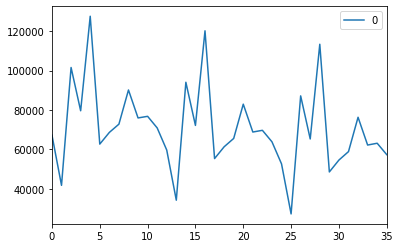

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing
 
y_hat = test[['FORCESIZE','RENEWAL_COUNT','RECRUITMENT']].copy()


fit_RN = ExponentialSmoothing(np.asarray(train['RENEWAL_COUNT']), seasonal_periods=12, trend='add', seasonal='add', ).fit()
y_hat['Holt_Winter_Renewal'] = fit_RN.forecast(len(test))

plt.figure(figsize=(9, 6))
plt.plot(train['RENEWAL_COUNT'], label='Train')
plt.plot(test['RENEWAL_COUNT'], label='Test')
plt.plot(y_hat['Holt_Winter_Renewal'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
forecast_RN = fit_RN.forecast(36)
forecast_RN = pd.DataFrame(forecast_RN)
forecast_RN.plot()

fit_RC = ExponentialSmoothing(np.asarray(train['RECRUITMENT']), seasonal_periods=12, trend='mul', seasonal='add', ).fit()
y_hat['Holt_Winter_Recruitment'] = fit_RC.forecast(len(test))
plt.figure(figsize=(9, 6))
plt.plot(train['RECRUITMENT'], label='Train')
plt.plot(test['RECRUITMENT'], label='Test')
plt.plot(y_hat['Holt_Winter_Recruitment'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
forecast_RC = fit_RC.forecast(36)
forecast_RC = pd.DataFrame(forecast_RC)
forecast_RC.plot()

y_hat['Holt_Winter']=y_hat['Holt_Winter_Renewal'] + y_hat['Holt_Winter_Recruitment']
y_hat['Holt_Winter_RN+RC'] = y_hat['Holt_Winter'].rolling(12).sum()

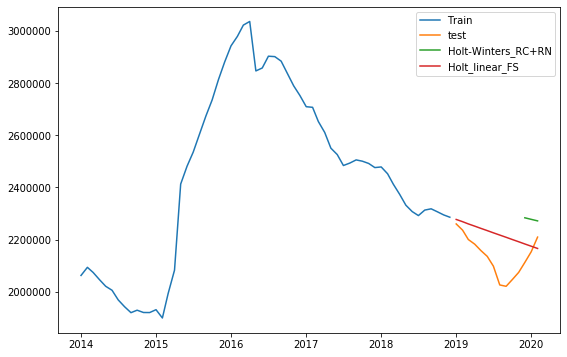

,FORCESIZE,RENEWAL_COUNT,RECRUITMENT,Holt_Winter_Renewal,Holt_Winter_Recruitment,Holt_Winter,Holt_Winter_RN+RC,Holt_linear_FS
CLND_DATE,,,,,,,,
2019-01-01,2260345,95548.0,48544.0,94331.683284,67214.868931,161546.552216,NaN,2.277553e+06
2019-02-01,2236649,80001.0,30198.0,91412.584455,41691.166088,133103.750543,NaN,2.269015e+06
2019-03-01,2200662,123471.0,49075.0,130355.340645,101570.899975,231926.240620,NaN,2.260476e+06
2019-04-01,2182958,102884.0,61535.0,118855.593217,79589.546472,198445.139689,NaN,2.251937e+06
2019-05-01,2158528,107526.0,58222.0,118186.077228,127618.640196,245804.717424,NaN,2.243399e+06
2019-06-01,2136241,102012.0,55872.0,104571.598718,62644.825140,167216.423858,NaN,2.234860e+06
2019-07-01,2098641,100179.0,50774.0,107958.529189,68585.188336,176543.717524,NaN,2.226321e+06
2019-08-01,2026701,114562.0,49176.0,127634.988578,72780.897854,200415.886432,NaN,2.217783e+06
2019-09-01,2021578,121831.0,117104.0,132263.348648,90145.310195,222408.658843,NaN,2.209244e+06


In [104]:
from statsmodels.tsa.api import Holt

fit_FS = Holt(np.asarray(train['FORCESIZE'].astype("float"))).fit()
y_hat['Holt_linear_FS'] = fit_FS.forecast(len(test))

plt.figure(figsize=(9, 6))
plt.plot(train['FORCESIZE'], label='Train')
plt.plot(test['FORCESIZE'], label='test')
plt.plot(y_hat['Holt_Winter_RN+RC'], label='Holt-Winters_RC+RN')
plt.plot(y_hat['Holt_linear_FS'], label='Holt_linear_FS')
plt.legend(loc='best')
plt.show()
y_hat